
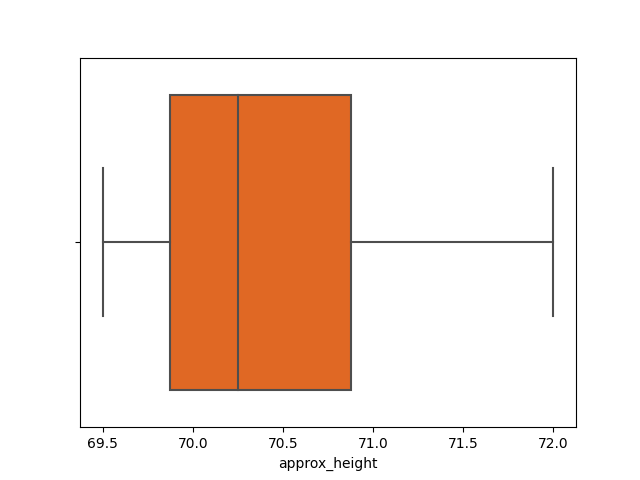
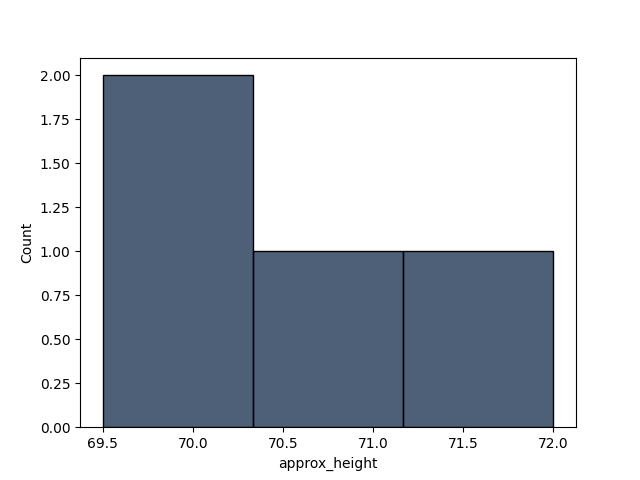
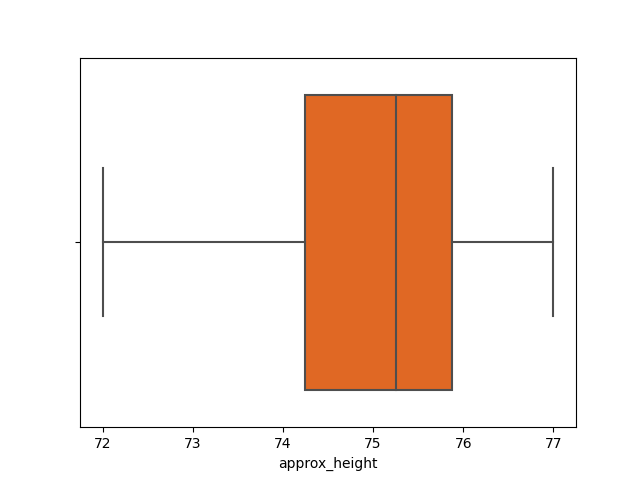
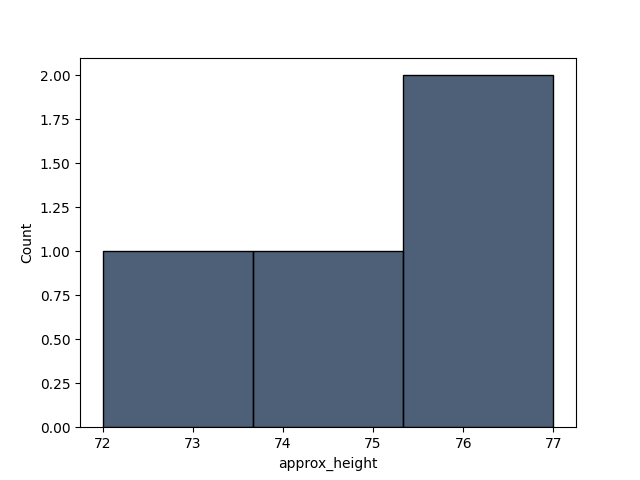
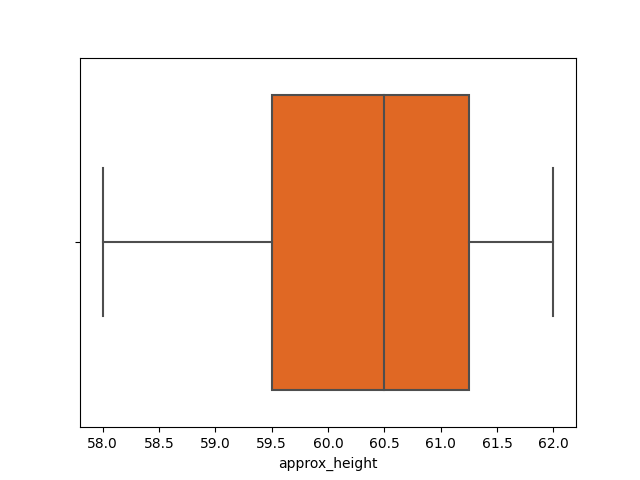
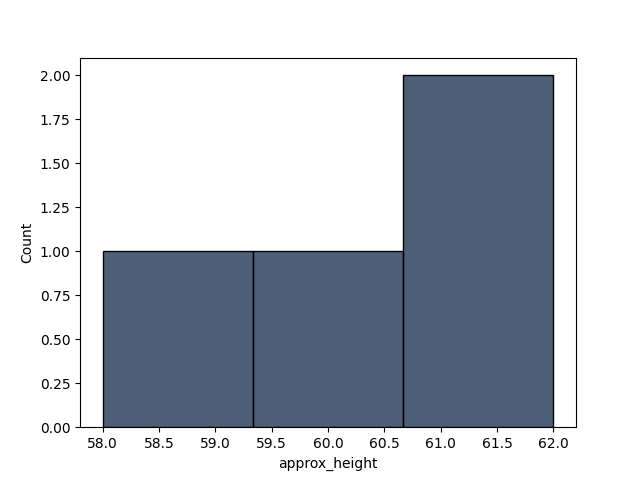
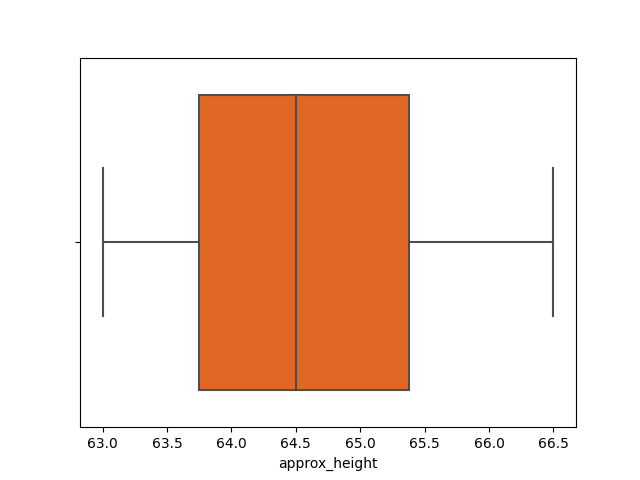
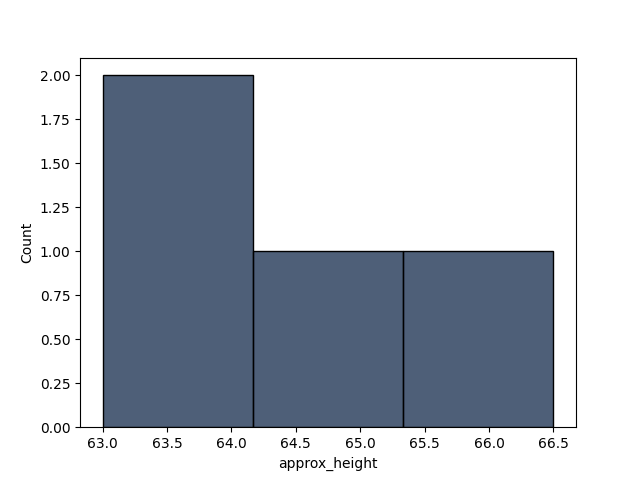
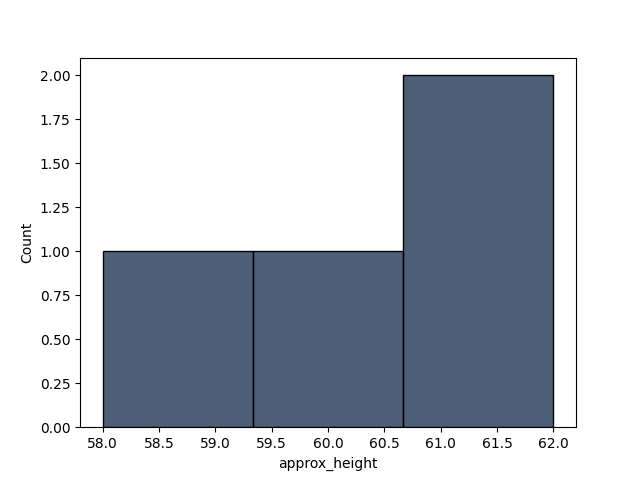
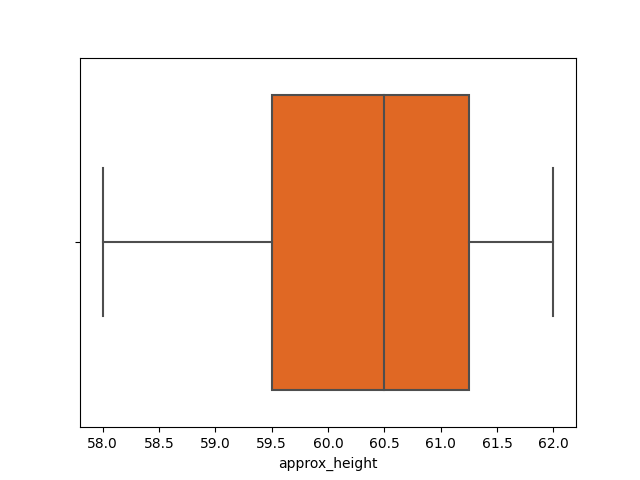

In [41]:
import param
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import panel as pn
pn.extension()

%matplotlib inline

df = pd.DataFrame({'Name':['John', 'Mark' ,'David', 'Joesph', 'John', 'Mark' ,'David', 'Joesph','John', 'Mark' 
                           ,'David', 'Joesph','John', 'Mark' ,'David', 'Joesph'], 
                   'approx_height':[60, 65, 70, 75, 61, 66.5, 69.5, 72, 62, 63, 72, 77, 58, 64, 70.5, 75.5]})

class RatingsDashboard(param.Parameterized):
    
    Name = param.ObjectSelector(default='John', objects=list(df.Name.unique()))
    
    def get_data(self):
        class_df = df[(df.Name==self.Name)].copy()
        return class_df
    
    # color branding here: https://marketing.illinois.edu/visual-identity/color
    
    def box_view(self):
        data = self.get_data() 
        ax = sns.boxplot(x=data['approx_height'], color='#FF5F05') #Illini Orange
        plt.close()
        return ax.figure
    
    
    def hist_view(self):
        data = self.get_data() 
        ax = sns.histplot(x=data['approx_height'], color='#13294B') # Illini Blue
        plt.close()
        return ax.figure

    def table_view(self):
        data = self.get_data()
        return data


rd = RatingsDashboard(name='')


dashboard_title = '# Peoples heights Dashboard'

dashboard_desc = 'An example of a simple interactive HoloViz Panel dashboard using a dummy data set of peoples heights.'

dashboard = pn.Column(dashboard_title, 
                      dashboard_desc,   
                      rd.param,       
                      rd.box_view,    # box plot
                      rd.hist_view,   # hist plot
                      rd.table_view   # data table
                     )

dashboard.embed(max_opts = 5)